In [8]:
#Import Dependencies
import sklearn
import tensorflow
import keras
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [9]:
#Veriable Creation

mp_holistic = mp.solutions.holistic             # Loades The Model (Holistic Model) To make detection
mp_drawing_utils = mp.solutions.drawing_utils   # draws the key points

In [10]:
#BGI to RGB for mediapipe as media pipe need RGB format

def mediapipe_detection(image, model):
    images = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # color Convertion BGR to RGB
    images.flags.writeable = False                    # image will no longer writable
    result = model.process(image)                  # make Pridiction
    images.flags.writeable = True                     # image will writable again
    images = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # color Convertion RGB to BGR
    return images, result

In [11]:
#Drawing The Landmarks on The Frames

def draw_landmarks(image, results):
    mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    #mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw Face Connections
    mp_drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw Pose Connection
    mp_drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw Left Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw Right Hand Connectio

In [12]:
# Drawing The Landmarks in Different Style

def draw_landmarks_style(image, results):
    # Draw Face Connections
    mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                    mp_drawing_utils.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                    mp_drawing_utils.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                                    )
    #mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw Face Connections
    # Draw Pose Connection
    mp_drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                                    )
    # Draw Left Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                                    )
    # Draw Right Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                    )

In [13]:
#Keypoint using Mediapipe *Holistic*

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():
        # read Feed (camera Video Frame)
        ret, frame = cap.read()

        # Make Detection
        image, results = mediapipe_detection(frame, holistic)
        """print(results) # Prints The Results
        print("Face Landmarks \n")
        print(results.face_landmarks) # Face Landmarks
        print("Pose Landmarks \n")
        print(results.pose_landmarks) # Pose Landmarks
        print("Left Hand Landmarks \n")
        print(results.left_hand_landmarks) # Left Hand Landmarks
        print("Right Hand Landmarks \n")
        print(results.right_hand_landmarks) # Right Hand Landmarks
        print("count \n")
        print(results.count)
        print("index \n")
        print(results.index)
        print("mro \n")
        print(results.mro)"""

        # Draw Landmarks in Style
        draw_landmarks_style(image, results)

        # Draw Landmarks in  normal
        #draw_landmarks(image, results)

        # Output To Screan
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() #destroys windows

In [14]:
# Extract Keypoint Values

pose = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    pose.append(test)
print(results.face_landmarks.landmark)
print(len(results.face_landmarks.landmark))
print(len(pose))
print(pose)

[x: 0.4212620258331299
y: 0.7173752784729004
z: -0.022934062406420708
, x: 0.41686663031578064
y: 0.6675071716308594
z: -0.05754610896110535
, x: 0.4171440005302429
y: 0.6792308688163757
z: -0.026925010606646538
, x: 0.4009624719619751
y: 0.6182730197906494
z: -0.048965808004140854
, x: 0.4153364598751068
y: 0.6529701948165894
z: -0.0628540962934494
, x: 0.41268759965896606
y: 0.6322606801986694
z: -0.06070772185921669
, x: 0.40584760904312134
y: 0.5802857279777527
z: -0.037835944443941116
, x: 0.3264124095439911
y: 0.586955189704895
z: 0.0022717867977917194
, x: 0.4018562138080597
y: 0.5470617413520813
z: -0.03541603684425354
, x: 0.3999735414981842
y: 0.5284277200698853
z: -0.04029456898570061
, x: 0.3913555145263672
y: 0.45459818840026855
z: -0.03783492371439934
, x: 0.42193591594696045
y: 0.7243108749389648
z: -0.02047409489750862
, x: 0.4221765100955963
y: 0.7286553978919983
z: -0.01606006547808647
, x: 0.42200765013694763
y: 0.729539692401886
z: -0.010595586150884628
, x: 0.42226

[array([ 0.42126203,  0.71737528, -0.02293406]), array([ 0.41686663,  0.66750717, -0.05754611]), array([ 0.417144  ,  0.67923087, -0.02692501]), array([ 0.40096247,  0.61827302, -0.04896581]), array([ 0.41533646,  0.65297019, -0.0628541 ]), array([ 0.4126876 ,  0.63226068, -0.06070772]), array([ 0.40584761,  0.58028573, -0.03783594]), array([0.32641241, 0.58695519, 0.00227179]), array([ 0.40185621,  0.54706174, -0.03541604]), array([ 0.39997354,  0.52842772, -0.04029457]), array([ 0.39135551,  0.45459819, -0.03783492]), array([ 0.42193592,  0.72431087, -0.02047409]), array([ 0.42217651,  0.7286554 , -0.01606007]), array([ 0.42200765,  0.72953969, -0.01059559]), array([ 0.42226988,  0.73434424, -0.00668792]), array([ 0.42301959,  0.74029201, -0.00786427]), array([ 0.42384112,  0.74751377, -0.00943309]), array([ 0.42452151,  0.75489938, -0.00711919]), array([0.42537075, 0.76692832, 0.0045166 ]), array([ 0.41726062,  0.67388511, -0.05105707]), array([ 0.40566355,  0.67342699, -0.03574746]

In [15]:
def extract_keypoints(results):
    face = pose = np.array([[res.x, res.y, res.z] for res in
                            results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in
                     results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    rh = np.array([[res.x, res.y, res.z] for res in
                   results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(
        21 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in
                   results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)

    return np.concatenate([pose, face, lh, rh])

In [16]:
#   Setting Up The Folders for Collection

result_test = extract_keypoints(results)
print(result_test)
np.save('0', result_test)
np.load('0.npy')

[ 0.41826448  0.65777582 -2.40843534 ...  0.          0.
  0.        ]


array([ 0.41826448,  0.65777582, -2.40843534, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
#   Path For the Exported Data, numpy Arrays

DATA_PATH = os.path.join('MP_Data_C2C_New')

In [18]:
#   Actions that we try to detect or Labels

actions = np.array(['Bye', 'Hi', 'We are Engineers'])

In [20]:
# In Action Detection We Need a Sequence of Frames rather than a Single Frame

no_sequences = 10       # Number Of Sequence Given or Equivalent to 10 videos data
sequence_length = 30    # Length Of The Sequence Given or 30 numbers of frame in each Video

In [21]:
# Data acquisition loop by Actions and Number of Sequences

for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
# Collecting The Keypoins data

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    # Loop by Actions
    for action in actions:
        # Loop By Sequences 0...29
        for sequence in range(no_sequences):
            # Loop By length of Video or Sequence
            for frame_num in range (sequence_length):

                # read Feed (camera Video Frame)
                ret, frame = cap.read()

                # Make Detection
                image, results = mediapipe_detection(frame, holistic)
                # Draw Landmarks in Style
                draw_landmarks_style(image, results)

                # Draw Landmarks in  normal
                # draw_landmarks(image, results)

                # Apply Collection Logic To Pause The Video While Collection
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection Of Frames', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting Frames for {} video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting Frames for {} video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # new Export Key Points
                Keypoint = extract_keypoints(results)
                #print("Keypoints: \n")
                #print(Keypoint)
                npy_path = os.path.join(DATA_PATH, action, str(sequence),str(frame_num))
                np.save(npy_path, Keypoint)

                # Output To Screan
                cv2.imshow('OpenCV Feed', image)

                # break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()  # destroys windowsq

In [23]:
# Preprocessing The Data and Create Lables and Features

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

label_map = {label : num for num, label in enumerate(actions)}
print(label_map)

sequences, labels = [], [] # sequences represents Feature Data or X data and Labels represents Y or Label Data
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

{'Bye': 0, 'Hi': 1, 'We are Engineers': 2}


In [24]:
print(sequences)
print(np.array(sequences).shape)
print(labels)
print(np.array(labels).shape)

[[array([ 0.76511091,  0.54882455, -0.8471837 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.76514614,  0.54813451, -0.61655283, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.76497978,  0.54760969, -0.53904855, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.7651664 ,  0.5473696 , -0.65631908, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.76176065,  0.54178208, -0.67231065, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.76170242,  0.52200568, -0.59802449, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.76130748,  0.51124632, -0.55172157, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.76164353,  0.50628269, -0.60497618, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.75837696,  0.4994655 , -0.60908955, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.78150558,  0.50259042, -0.6664421 , ...,  0.        ,
        0.        ,  0.        ]), array([ 

In [25]:
# PreProcess

X = np.array(sequences)
print(X.shape)

Y = to_categorical(labels).astype(int)
print(Y) # [1,0,0] Bye [0,1,0] Hi [0, 0, 1] We are Engineers

(30, 30, 1662)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [39]:
#Train And Test Split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) # test_size=0.05 means Test Pertition will be 5% of our Data
print(x_train.shape)  # Shape of the training input data
print(x_test.shape)   # Shape of the testing input data
print(y_train.shape)  # Shape of the training target data
print(y_test.shape)   # Shape of the testing target data

(28, 30, 1662)
(2, 30, 1662)
(28, 3)
(2, 3)


In [30]:
# Build and Train The LSTM Neural Network

from keras.models import Sequential # Sequential Neural Network
from keras.layers import LSTM, Dense # LSTM Layer for Action Detection
from keras.callbacks import TensorBoard # Trace and Monitor Our Model

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [32]:
# Building The Neural Network Architecture

model = Sequential() # Instantiating the model
# There is the three sets of LSTM layer
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662))) # 64 LSTM Units 30 Frames 1662 Keypoints
model.add(LSTM(128, return_sequences=True, activation='relu')) # 128 LSTM Units
model.add(LSTM(64, return_sequences=False, activation='relu')) # 64 LSTM the return_sequences is false here as the next layer is the Dence Layer Not a LSTM Layer
model.add(Dense(64, activation='relu')) # 64 Dense units fully Connected layers
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # as activation='softmax' so it will return a value which has a probability betwwen  0 to 1

In [33]:
res = [.7,.5,.4]
print(actions[np.argmax(res)])

res = [.7,.8,.4]
print(actions[np.argmax(res)])

res = [.1,.2,.4]
print(actions[np.argmax(res)])

Bye
Hi
We are Engineers


In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=115, callbacks=[tb_callback]) # tensorboard --logdir=.

Epoch 1/115
1/1 [==============================] - 23s 23s/step - loss: 183.1640 - categorical_accuracy: 0.3929
Epoch 2/115
1/1 [==============================] - 0s 296ms/step - loss: 115.1688 - categorical_accuracy: 0.3571
Epoch 3/115
1/1 [==============================] - 0s 336ms/step - loss: 75.1426 - categorical_accuracy: 0.4643
Epoch 4/115
1/1 [==============================] - 0s 339ms/step - loss: 43.7404 - categorical_accuracy: 0.4286
Epoch 5/115
1/1 [==============================] - 0s 361ms/step - loss: 68.0483 - categorical_accuracy: 0.3214
Epoch 6/115
1/1 [==============================] - 0s 490ms/step - loss: 56.7010 - categorical_accuracy: 0.2500
Epoch 7/115
1/1 [==============================] - 0s 334ms/step - loss: 42.2424 - categorical_accuracy: 0.3571
Epoch 8/115
1/1 [==============================] - 0s 336ms/step - loss: 50.0854 - categorical_accuracy: 0.4286
Epoch 9/115
1/1 [==============================] - 0s 352ms/step - loss: 89.8795 - categorical_accuracy

In [36]:
model.load_weights('action1_C1.h5')

In [37]:
print(model.summary()) # Summery of The Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [40]:
# Make Predictions

result_x_test = model.predict(x_test)

print(np.sum(result_x_test))
print(actions[np.argmax(result_x_test[0])])
print(actions[np.argmax(y_test[0])])

1/1 [==============================] - 4s 4s/step
1.9999999
Hi
Hi


In [41]:
# Save The Model
model.save('action1_C1.h5')

In [28]:
# Reloade The Model
model.load_weights('action1_C1.h5')

In [41]:
#Evalution Using Confusion Matrix and Accuracy

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(x_test)
yTrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print(multilabel_confusion_matrix(yTrue, yhat))
print(accuracy_score(yTrue, yhat))

yhat = model.predict(x_train)
yTrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print(multilabel_confusion_matrix(yTrue, yhat))
print(accuracy_score(yTrue, yhat))

1/1 [==============================] - 0s 233ms/step
[[[0 0]
  [0 2]]]
1.0
1/1 [==============================] - 0s 197ms/step
[[[17  1]
  [ 5  5]]

 [[18  2]
  [ 1  7]]

 [[14  4]
  [ 1  9]]]
0.75


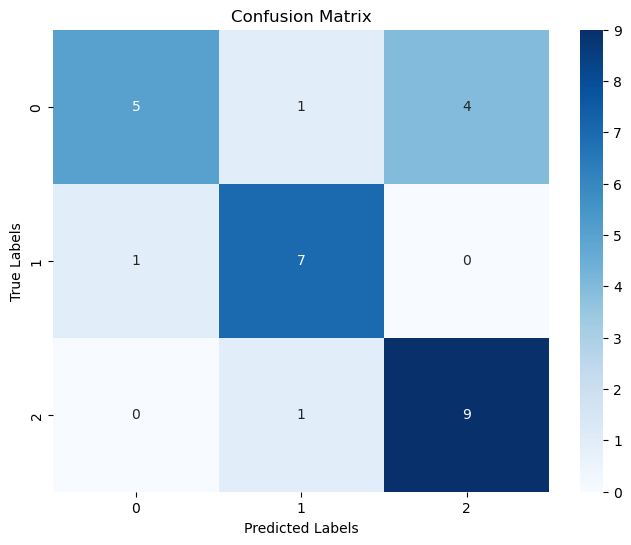

Accuracy: 0.75


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix
cm = confusion_matrix(yTrue, yhat)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Compute and print the accuracy
accuracy = accuracy_score(yTrue, yhat)
print("Accuracy:", accuracy)

In [43]:
# Test Prediction VIew Bar

from scipy import stats

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

In [44]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

    return output_frame

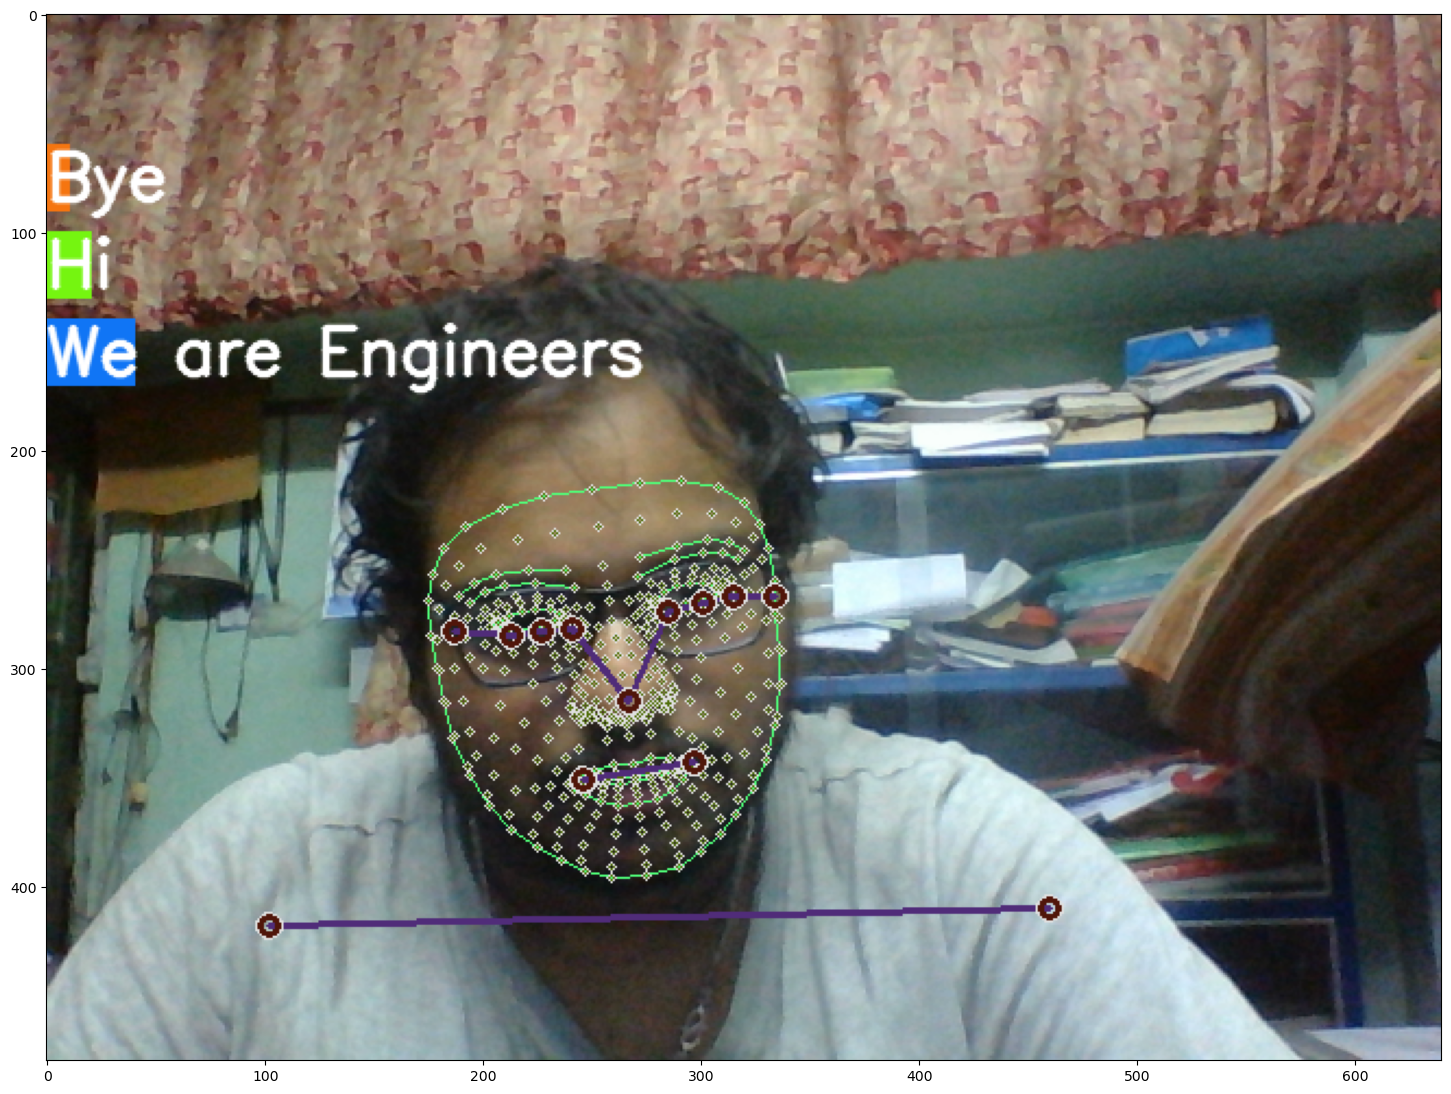

In [45]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [46]:
# Test In Real Time

sequence = []
sentence = [] # Concadination Of Words
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():
        # read Feed (camera Video Frame)
        ret, frame = cap.read()

        # Make Detection
        image, results = mediapipe_detection(frame, holistic)
        #print(results) # Prints The Results
        #print(results.face_landmarks) # Face Landmarks
        #print(results.pose_landmarks) # Pose Landmarks
        #print(results.left_hand_landmarks) # Left Hand Landmarks
        #print(results.right_hand_landmarks) # Right Hand Landmarks
        #print(results.count)
        #print(results.index)
        #print(results.mro)

        # Draw Landmarks in Style
        draw_landmarks_style(image, results)

        # Prediction Logic

        KeyPoints = extract_keypoints(results)
        # sequence.insert(0, KeyPoints)
        # sequence = sequence[:30]
        sequence.append(KeyPoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Visualization Logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence)>0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Draw Landmarks in  normal
        #draw_landmarks(image, results)

        # Output To Screan
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 82ms/step
Bye
1/1 [==============================] - 0s 86ms/step
Bye
1/1 [==============================] - 0s 78ms/step
Bye
1/1 [==============================] - 0s 90ms/step
Bye
1/1 [==============================] - 0s 86ms/step
Bye
1/1 [==============================] - 0s 87ms/step
Bye
1/1 [==============================] - 0s 92ms/step
Bye
1/1 [==============================] - 0s 96ms/step
Bye
1/1 [==============================] - 0s 86ms/step
Bye
1/1 [==============================] - 0s 87ms/step
Bye
1/1 [==============================] - 0s 87ms/step
Bye
1/1 [==============================] - 0s 190ms/step
Bye
1/1 [==============================] - 0s 79ms/step
Bye
1/1 [==============================] - 0s 82ms/step
Bye
1/1 [==============================] - 0s 78ms/step
Bye
1/1 [==============================] - 0s 78ms/step
Bye
1/1 [==============================] - 0s 80ms/step
Bye
1/1 [==============================] - 0s 89ms/

1/1 [==============================] - 0s 119ms/step
Hi
1/1 [==============================] - 0s 106ms/step
Hi
1/1 [==============================] - 0s 105ms/step
Hi
1/1 [==============================] - 0s 99ms/step
Hi
1/1 [==============================] - 0s 99ms/step
Hi
1/1 [==============================] - 0s 101ms/step
Hi
1/1 [==============================] - 0s 114ms/step
Hi
1/1 [==============================] - 0s 115ms/step
Hi
1/1 [==============================] - 0s 79ms/step
Hi
1/1 [==============================] - 0s 84ms/step
Hi
1/1 [==============================] - 0s 86ms/step
Hi
1/1 [==============================] - 0s 85ms/step
Hi
1/1 [==============================] - 0s 95ms/step
Hi
1/1 [==============================] - 0s 87ms/step
Hi
1/1 [==============================] - 0s 75ms/step
Hi
1/1 [==============================] - 0s 80ms/step
Hi
1/1 [==============================] - 0s 88ms/step
Hi
1/1 [==============================] - 0s 92ms/step
Hi
1/1 

In [ ]:
# Test In Real Time

sequence = []
sentence = [] # Concadination Of Words
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():
        # read Feed (camera Video Frame)
        ret, frame = cap.read()

        # Make Detection
        image, results = mediapipe_detection(frame, holistic)

        # Draw Landmarks in Style
        draw_landmarks_style(image, results)

        # Prediction Logic
        KeyPoints = extract_keypoints(results)
        sequence.append(KeyPoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Visualization Logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence)>0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Output To Screan
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()